In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Aeron.csv")

In [3]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,11-05-2021,0.035761,0.043083,0.028700,0.029179,204328.96,583574.24
1,10-05-2021,0.043469,0.048257,0.003898,0.036618,196523.08,732359.59
2,09-05-2021,0.044187,0.044459,0.032999,0.043488,140539.47,869751.68


In [4]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1282 non-null   object 
 1   Open        1282 non-null   float64
 2   High        1282 non-null   float64
 3   Low         1282 non-null   float64
 4   Close       1282 non-null   float64
 5   Volume      1282 non-null   float64
 6   Market Cap  1282 non-null   float64
dtypes: float64(6), object(1)
memory usage: 70.2+ KB


In [6]:
df.drop(['Date'],axis=1,inplace=True)

In [7]:
df.shape

(1282, 6)

In [8]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1282.000000,1282.000000,1282.000000,1282.000000,1.282000e+03,1.282000e+03
mean,0.443325,0.487643,0.404938,0.443481,3.924819e+06,6.450910e+06
std,0.674411,0.789671,0.577990,0.678045,2.012568e+07,8.683618e+06
min,0.003554,0.004933,0.002081,0.002846,3.843500e+01,0.000000e+00
25%,0.097457,0.105578,0.092640,0.097302,6.335668e+05,1.943617e+06
50%,0.230883,0.243041,0.219417,0.230646,1.615820e+06,3.849638e+06
75%,0.471184,0.500553,0.445720,0.469791,3.390990e+06,8.014126e+06
max,8.346660,9.755920,4.594850,8.706430,6.789880e+08,1.131836e+08


In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

In [10]:
import matplotlib.pyplot as plt
  

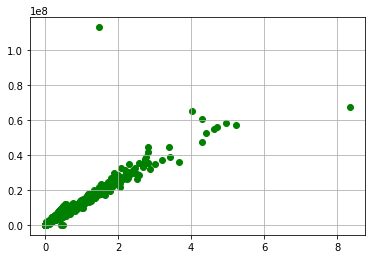

In [11]:
plt.scatter(df['Open'], df['Market Cap'], color='green')
plt.grid(True)
plt.show()

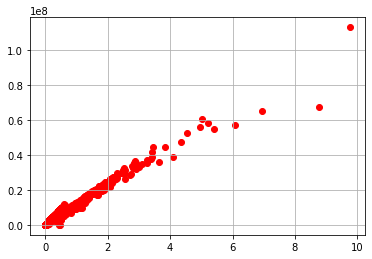

In [12]:
plt.scatter(df['High'], df['Market Cap'], color='red')
plt.grid(True)
plt.show()

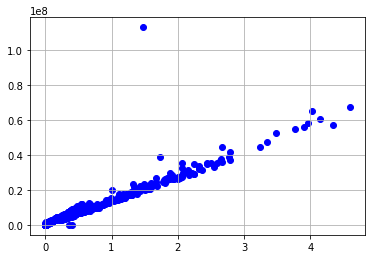

In [13]:
plt.scatter(df['Low'], df['Market Cap'], color='blue')
plt.grid(True)
plt.show()

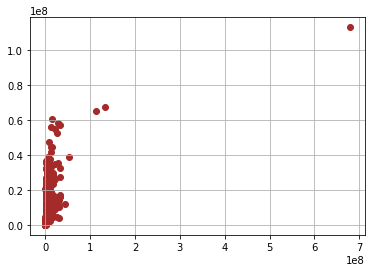

In [14]:
plt.scatter(df['Volume'], df['Market Cap'], color='brown')
plt.grid(True)
plt.show()

In [16]:
from sklearn import linear_model
import statsmodels.api as sm

In [17]:
X=df.drop(["Market Cap"], axis=1)

y=df["Market Cap"]

In [15]:
from sklearn import preprocessing
from sklearn import utils

In [18]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [19]:
print(utils.multiclass.type_of_target(y))

continuous


In [20]:
print(utils.multiclass.type_of_target(y.astype('int')))

multiclass


In [21]:
print(utils.multiclass.type_of_target(encoded))

multiclass


In [23]:
regr = linear_model.LinearRegression()
regr.fit(X, encoded)

LinearRegression()

In [24]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 415.3523280513241
Coefficients: 
 [ 1.14602091e+02 -9.73271029e+02  1.31155130e+03  1.71975198e+02
  1.03408711e-05]


In [25]:
X = sm.add_constant(X)

In [26]:
model = sm.OLS(encoded, X).fit()
predictions = model.predict(X) 

In [27]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     383.2
Date:                Wed, 23 Jun 2021   Prob (F-statistic):          4.81e-251
Time:                        10:33:13   Log-Likelihood:                -8812.7
No. Observations:                1282   AIC:                         1.764e+04
Df Residuals:                    1276   BIC:                         1.767e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        415.3523      8.363     49.666      0.0

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model1 =  LinearRegression()

In [24]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [25]:
X_train, X_test, encoded_train, encoded_test = train_test_split(X, encoded, train_size=0.7)

In [26]:
result = []
model1.fit(X_train, encoded_train)
result.append(model1.score(X_test, encoded_test))
result

[0.5290373976586329]

In [27]:
y_pred = model1.predict(X_test)

In [28]:
df1=pd.DataFrame({'Predicted values':y_pred,'Actual values':encoded_test})
df1

,Predicted values,Actual values
0,523.431018,448
1,675.345332,948
2,412.968469,274
3,486.505356,354
4,2012.027741,1263
...,...,...
380,548.679558,537
381,421.609591,168
382,491.505934,308
383,674.827738,922


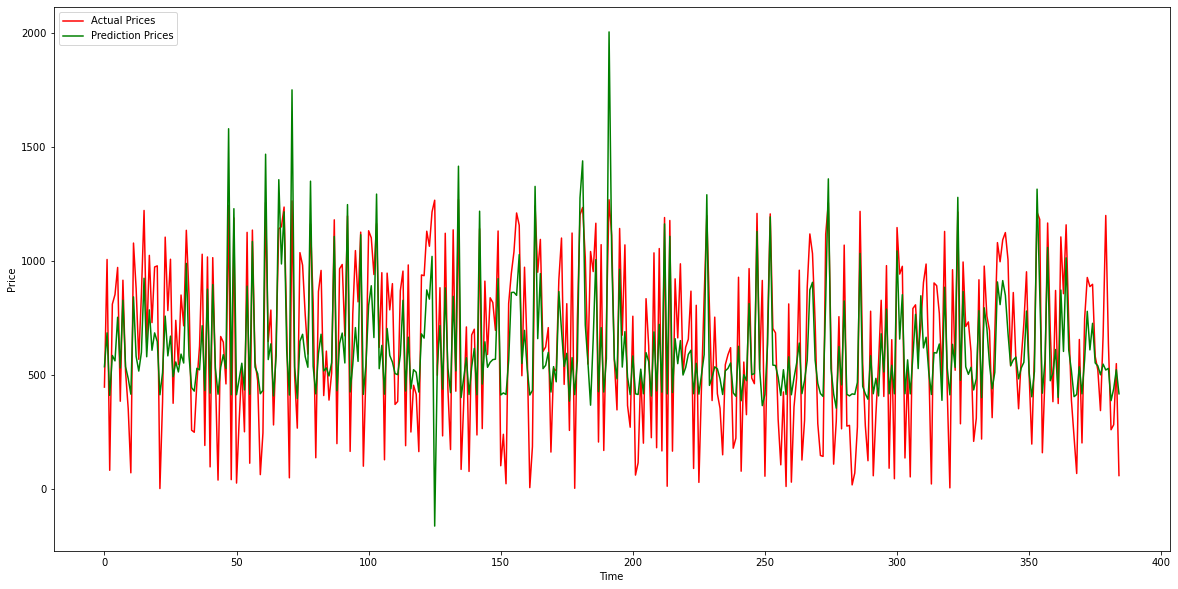

In [46]:
plt.plot(encoded_test, color='red', label='Actual Prices')
plt.plot(y_pred, color='green', label='Prediction Prices')
plt.rcParams["figure.figsize"] = (30,10)
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left") 
plt.show()

In [29]:
import pickle

In [30]:
pkl_file= open('aeronf.pkl',"wb")

In [31]:
pickle.dump(model1,pkl_file)

In [32]:
pkl_file.close()